In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee = pd.read_csv('../Data/final_df_copy.csv')

In [3]:
refugee

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.400000,122.810000,Republic,1.919900e+04,105090.0,327.0000,116.47000,2.911700e+07,250001.050,1.0,49.300000,50.700000,0.0,36.000000
1,Angola,AGO,Africa,15155.0,15537.0,9.157481,25.420000,Republic,1.026430e+05,87436.0,1010.0000,39.46000,1.899300e+07,481353.360,0.0,50.400000,49.600000,0.0,40.500000
2,Albania,ALB,Europe,76.0,79.0,4.500000,6.860000,Republic,1.145600e+04,57616.0,1485.0000,287.85000,3.195000e+06,11099.660,0.0,49.900000,50.100000,0.0,14.300000
3,United Arab Emirates,ARE,Asia,538.0,658.0,0.920000,0.626000,Absolute monarchy,3.702930e+05,7826981.0,78.0000,147.09000,4.707000e+06,32000.130,0.0,29.900000,70.100000,0.0,19.500000
4,Argentina,ARG,South America,3276.0,3142.0,5.500000,0.938000,Republic,5.480550e+05,1885678.0,591.0000,37.93000,4.051895e+07,1068301.760,0.0,51.100000,48.900000,0.0,30.000000
5,Armenia,ARM,Europe,3296.0,19309.0,2.500000,2.780000,Republic,1.056100e+04,317001.0,562.0000,281.42000,3.238000e+06,11505.840,0.0,48.600000,51.400000,0.0,35.800000
6,Australia,AUS,Oceania,21805.0,36827.0,1.300000,3.060000,Constitutional monarchy,1.339539e+06,6763663.0,534.0000,7.55000,2.348097e+07,2967908.160,0.0,50.200000,49.800000,0.0,29.451064
7,Austria,AUT,Europe,42630.0,72158.0,0.550000,3.010000,Republic,3.740560e+05,1492374.0,1110.0000,258.60000,8.372930e+06,32377.740,0.0,51.200000,48.800000,0.0,6.200000
8,Azerbaijan,AZE,Europe,1891.0,1269.0,2.000000,7.010000,Republic,5.304700e+04,323843.0,447.0000,269.09000,8.997400e+06,33436.430,0.0,50.300000,49.700000,0.0,6.000000
9,Burundi,BDI,Africa,29365.0,53356.0,37.000000,8.790000,Republic,3.085000e+03,254477.0,1274.0000,792.82000,8.519000e+06,10745.220,1.0,50.600000,49.400000,0.0,68.000000


# Linear Regression

In [4]:
#A simple Linear Regression that predicts the number of refugees in 2015 based on the number of refugees in
#2010, population density of each country (total number of population / area in sq mi), population, recent Famine
#in 15 years, Female and Male population.

value = refugee.filter(regex = 'Ref|Dens|Pop|Fam|Fem|Mal')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X_linear = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X_linear)
y_linear = refugee['Refugees_2015'].values

lm_linear = LinearRegression()
model = lm_linear.fit(X_linear, y_linear)
scores = cross_val_score(lm_linear, X_linear, y_linear, cv=5)
print "R2", np.mean(scores)

R2 0.383677325074


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [5]:
for f, c in zip(X_linear, lm_linear.coef_):
    print f, c

Density(pop/mi) 5.11278502466
Famine 110800.389458
Female 775.57937629
Male -775.579375999
Population 9.2759843115e-05
Refugees_2010 0.704279104648


# Logistic Regression

In [6]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [7]:
#Logistic Regression looking into the Continent based on the number of Refugees in 2010, 2015, Murder Rate, 
#Children out of primary school, Area, and Recent Famine

value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Continent')
rem = refugee.filter(regex = 'Cont')
col = value.columns - rem.columns
X_cont = refugee[col]
ss = StandardScaler()
Xn_cont = ss.fit_transform(X_cont)
y_cont = refugee['Continent'].values

lr_cont = LogisticRegression()
model = lr_cont.fit(Xn_cont, y_cont)
score = cross_val_score(lr_cont, Xn_cont, y_cont, cv = 5)
print "R2", np.mean(score)

R2 0.56174649723


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [8]:
for f, c in zip(X_cont, lr_cont.coef_):
    print f, np.mean(c)

Area(mi) 0.277975315946
Children_out_of_school -0.0760046506507
Famine -0.890541181768
Murder Rate -0.0235327046536
Refugees_2010 -0.113074623317
Refugees_2015 -0.0524038633061


In [9]:
#Setting the variables for the ROC curve by looking into the Civil War binary value, based on the number of Refugees 
#in 2010, 2015, Murder Rate, Children out of primary school, area of a country, and recent famine in the past 15 years.

value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X_civ = refugee[col]
ss = StandardScaler()
Xn_civ = ss.fit_transform(X_civ)
y_civ = refugee['Civil'].values

lm_civ = LogisticRegression()
X_train_civ, X_test_civ, y_train_civ, y_test_civ = train_test_split(Xn_civ, y_civ, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [10]:
#Setting the variables for the ROC curve by looking into the countrys with a famine in the past 15 years based on the 
#number of refugees in 2010, 2015, Murder Rate, Primary school children out of school, Area, and recent Civil War.

value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Fam')
col = value.columns - rem.columns
X_fam = refugee[col]
ss = StandardScaler()
Xn_fam = ss.fit_transform(X_fam)
y_fam = refugee['Famine'].values

lm_fam = LogisticRegression()
X_train_fam, X_test_fam, y_train_fam, y_test_fam = train_test_split(Xn_fam, y_fam, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


# ROC Curve

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

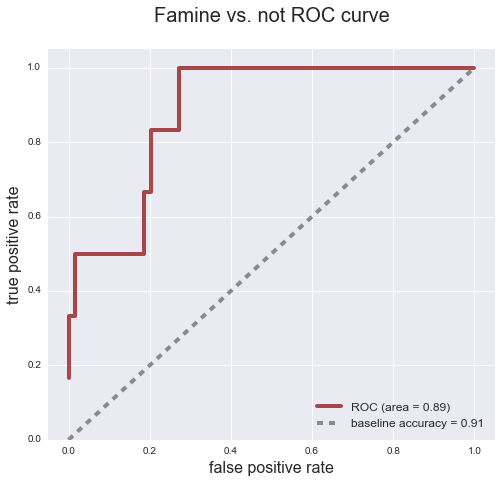

In [12]:
plot_roc(lm_fam, X_test_fam, y_test_fam, 'Famine')

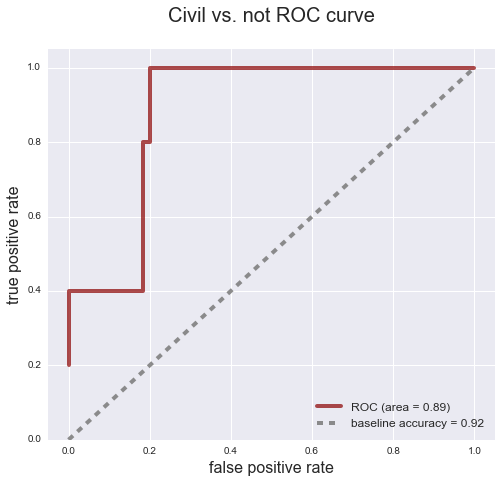

In [13]:
plot_roc(lm_civ, X_test_civ, y_test_civ, 'Civil')

# Precision Recall Curve

In [14]:
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

In [15]:
def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()

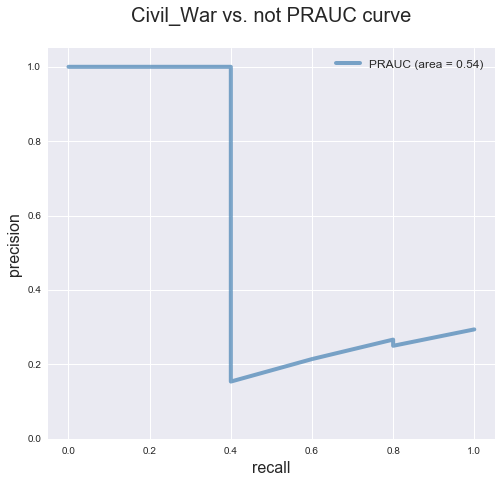

In [16]:
plot_prauc(lm_civ, X_test_civ, y_test_civ, 'Civil_War')

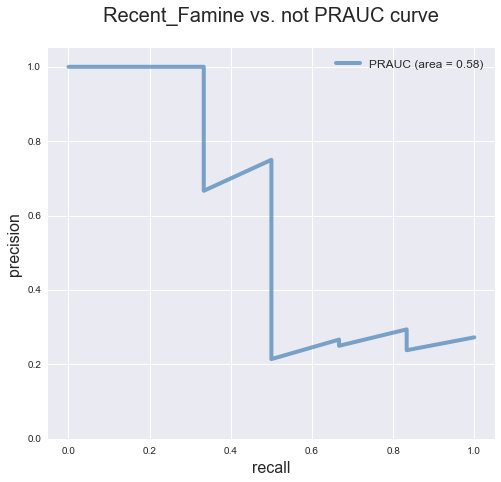

In [17]:
plot_prauc(lm_fam, X_test_fam, y_test_fam, 'Recent_Famine')

# Decision Tree Classifier

In [18]:
value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Continent')
rem = refugee.filter(regex = 'Cont')
col = value.columns - rem.columns
X_dec_cont = refugee[col]
ss = StandardScaler()
Xn_dec_cont = ss.fit_transform(X_dec_cont)
y_dec_cont = refugee['Continent'].values

X_train_dec, X_test_dec, y_train_dec, y_test_dec = train_test_split(Xn_dec_cont, y_dec_cont, test_size=0.3)

## Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier(criterion='entropy')

## Search parameters
dtc_params = {
    'max_depth':[1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [19]:
dtc_gs.fit(X_train_dec, y_train_dec)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [20]:
## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs.best_score_

best estimator DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 5, 'max_depth': 3}


best score 0.504424778761


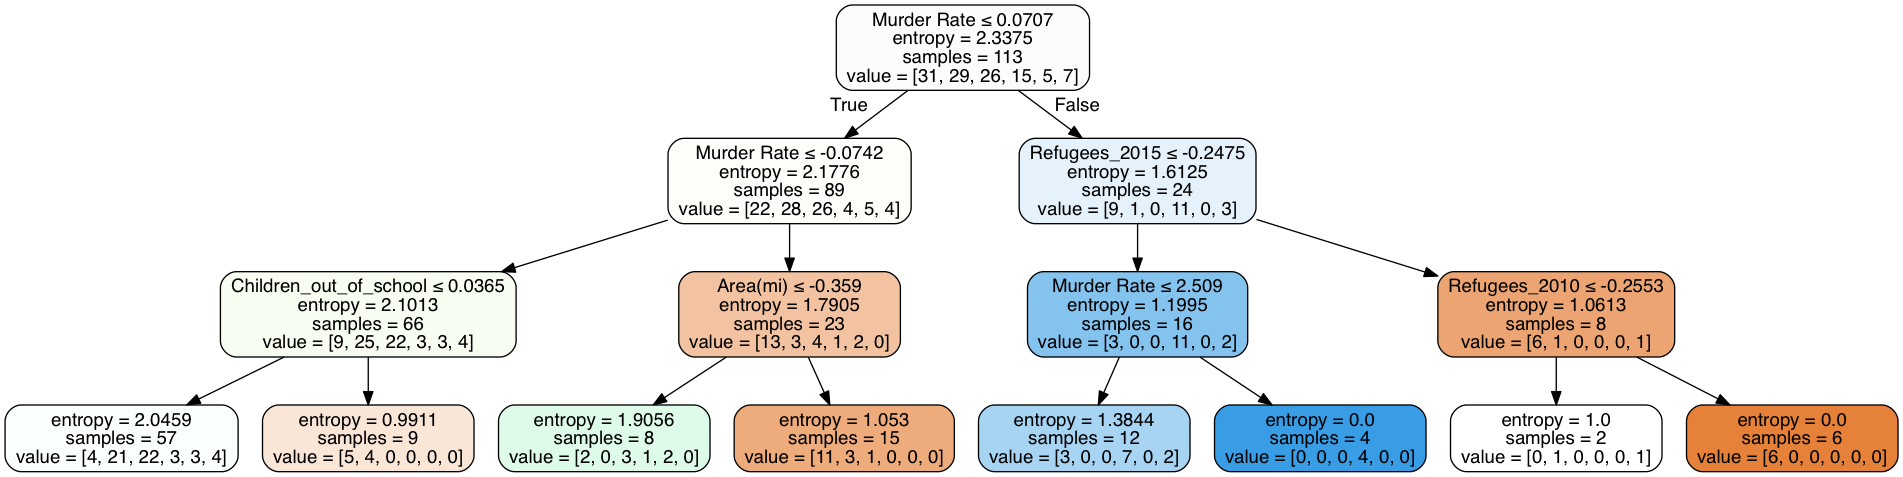

In [21]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_dec_cont.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

value = refugee.filter(regex = 'Ref|Dens|Pop|Fam|Fem|Mal')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X_dec_ref = refugee[col]
ss = StandardScaler()
Xn_dec_ref = ss.fit_transform(X_dec_ref)
y_dec_ref = refugee['Refugees_2015'].values

X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(Xn_dec_ref, y_dec_ref, test_size=0.3)

## Define your DecisionTreeClassifier
dctc_ref = DecisionTreeRegressor()

## Search parameters
dtc_params = {
    'max_depth':[1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc_ref, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [23]:
dtc_gs.fit(X_train_ref, y_train_ref)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:    5.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [24]:
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=5,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 5, 'min_samples_split': 10, 'max_depth': 4}


best score 0.394867739893


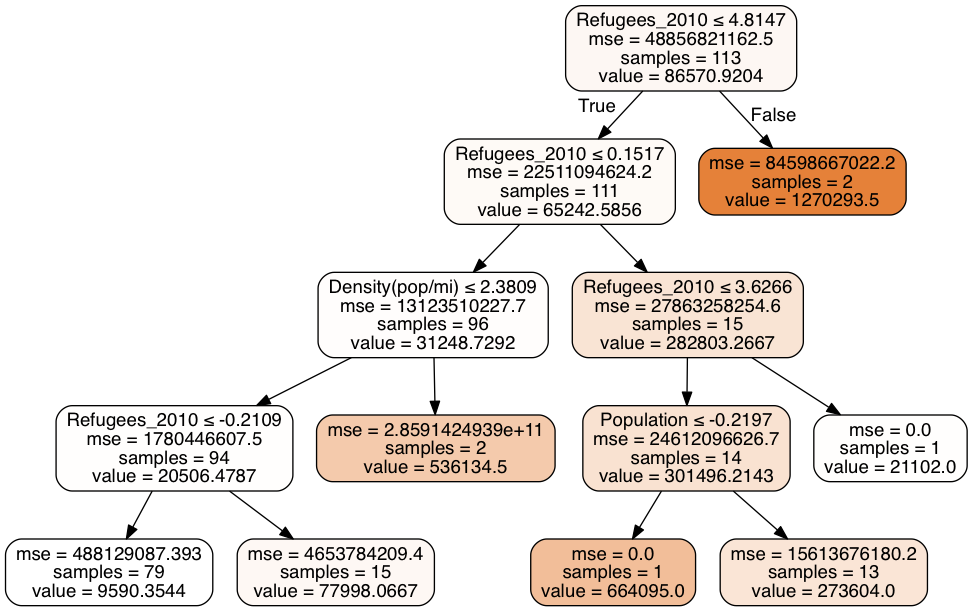

In [25]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_dec_ref.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

# PCA

In [26]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [27]:
# value = refugee.filter(regex = 'Ref|Dens|Pop|Fam|Fem|Mal')
# rem = refugee.filter(regex = '2015')
# col = value.columns - rem.columns
# X = refugee[col]
# ss = StandardScaler()
# Xn = ss.fit_transform(X)
# y = refugee['Refugees_2015'].values

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X_linear.values)

PCA(copy=True, n_components=6, whiten=False)

In [29]:
pcs = pca.transform(X_linear)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y_linear, cv=5)
print np.mean(pca_scores)

0.383677328307


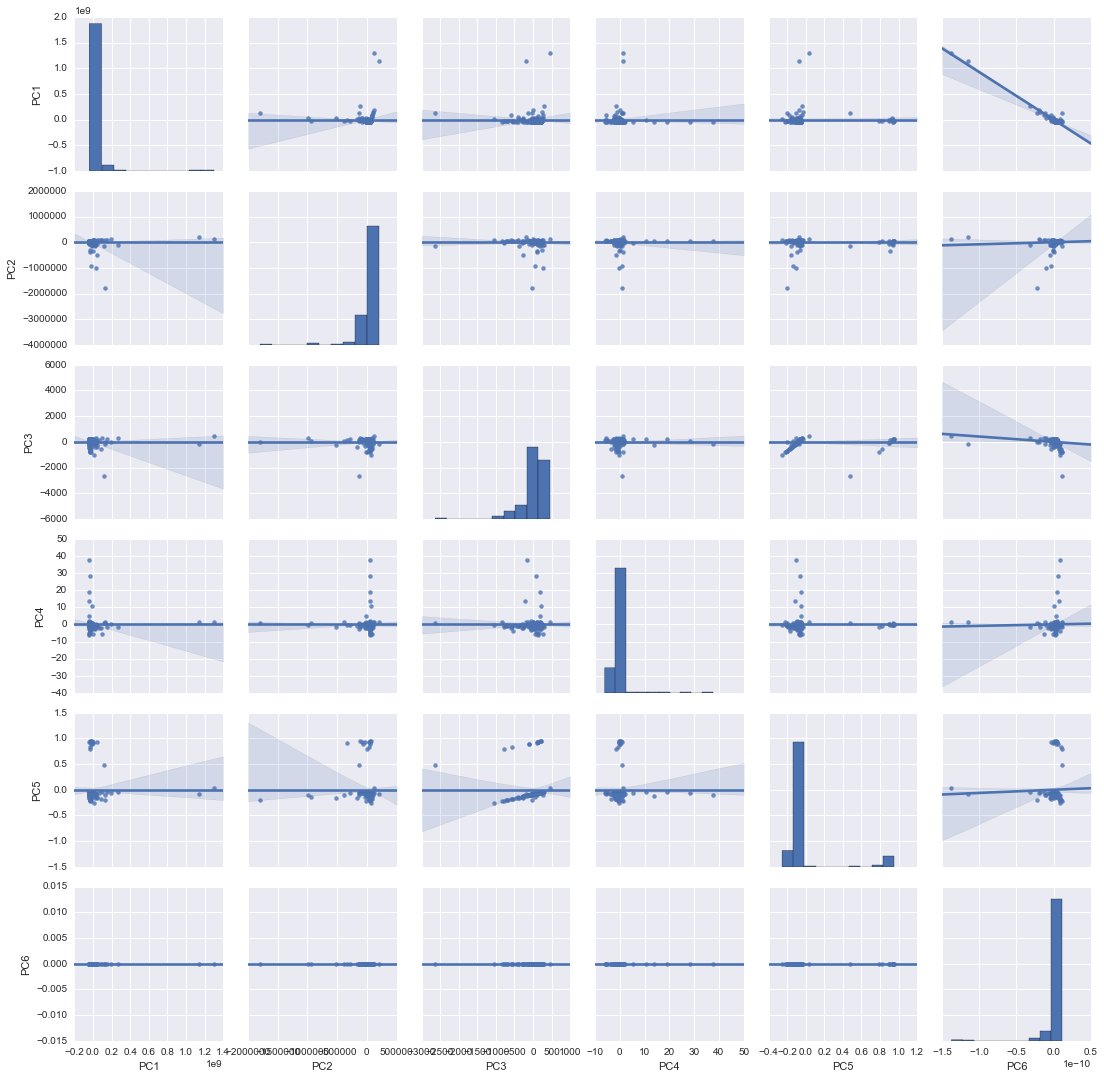

In [30]:
pca_graph = sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']), kind='reg')
pca_graph